In [164]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from mlxtend.preprocessing import shuffle_arrays_unison
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelBinarizer
from sklearn.base import BaseEstimator, ClassifierMixin


In [165]:

# Consider 1.1 columns as label
df=pd.read_csv("german_credit_data.csv")
df

,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1.1
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
995,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
996,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
997,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [166]:
df.isnull().sum()

A11     0
6       0
A34     0
A43     0
1169    0
A65     0
A75     0
4       0
A93     0
A101    0
4.1     0
A121    0
67      0
A143    0
A152    0
2       0
A173    0
1       0
A192    0
A201    0
1.1     0
dtype: int64

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A11     999 non-null    object
 1   6       999 non-null    int64 
 2   A34     999 non-null    object
 3   A43     999 non-null    object
 4   1169    999 non-null    int64 
 5   A65     999 non-null    object
 6   A75     999 non-null    object
 7   4       999 non-null    int64 
 8   A93     999 non-null    object
 9   A101    999 non-null    object
 10  4.1     999 non-null    int64 
 11  A121    999 non-null    object
 12  67      999 non-null    int64 
 13  A143    999 non-null    object
 14  A152    999 non-null    object
 15  2       999 non-null    int64 
 16  A173    999 non-null    object
 17  1       999 non-null    int64 
 18  A192    999 non-null    object
 19  A201    999 non-null    object
 20  1.1     999 non-null    int64 
dtypes: int64(8), object(13)
memory usage: 164.0+ KB


## R1

In [168]:
train_df,other_df=df.iloc[:int(len(df)*0.6),:],df.iloc[int(len(df)*0.6):,:]

In [169]:
train_df

,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1.1
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,A12,6,A31,A40,931,A62,A72,1,A92,A101,...,A122,32,A142,A152,1,A172,1,A191,A201,2
595,A11,24,A32,A40,1442,A61,A74,4,A92,A101,...,A123,23,A143,A151,2,A173,1,A191,A201,2
596,A12,24,A30,A49,4241,A61,A73,1,A93,A101,...,A121,36,A143,A152,3,A172,1,A192,A201,2
597,A14,18,A34,A40,2775,A61,A74,2,A93,A101,...,A122,31,A141,A152,2,A173,1,A191,A201,2


In [170]:
val_df,test_df=other_df.iloc[:int(len(df)*0.2),:],other_df.iloc[int(len(df)*0.2):,:]

In [171]:
val_df

,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1.1
599,A12,7,A32,A43,2329,A61,A72,1,A92,A103,...,A121,45,A143,A152,1,A173,1,A191,A201,1
600,A12,9,A32,A42,918,A61,A73,4,A92,A101,...,A122,30,A143,A152,1,A173,1,A191,A201,2
601,A12,24,A31,A46,1837,A61,A74,4,A92,A101,...,A124,34,A141,A153,1,A172,1,A191,A201,2
602,A14,36,A32,A42,3349,A61,A73,4,A92,A101,...,A123,28,A143,A152,1,A174,1,A192,A201,2
603,A13,10,A32,A42,1275,A61,A72,4,A92,A101,...,A122,23,A143,A152,1,A173,1,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,A14,24,A32,A42,3062,A63,A75,4,A93,A101,...,A124,32,A143,A151,1,A173,1,A192,A201,1
794,A14,9,A32,A42,2301,A62,A72,2,A92,A101,...,A122,22,A143,A151,1,A173,1,A191,A201,1
795,A11,18,A32,A41,7511,A65,A75,1,A93,A101,...,A122,51,A143,A153,1,A173,2,A192,A201,2
796,A14,12,A34,A42,1258,A61,A72,2,A92,A101,...,A122,22,A143,A151,2,A172,1,A191,A201,1


In [172]:
test_df

,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1.1
798,A12,9,A32,A40,1549,A65,A72,4,A93,A101,...,A121,35,A143,A152,1,A171,1,A191,A201,1
799,A14,24,A34,A46,1597,A61,A75,4,A93,A101,...,A124,54,A143,A153,2,A173,2,A191,A201,1
800,A12,18,A34,A43,1795,A61,A75,3,A92,A103,...,A121,48,A141,A151,2,A172,1,A192,A201,1
801,A11,20,A34,A42,4272,A61,A75,1,A92,A101,...,A122,24,A143,A152,2,A173,1,A191,A201,1
802,A14,12,A34,A43,976,A65,A75,4,A93,A101,...,A123,35,A143,A152,2,A173,1,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
995,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
996,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
997,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [173]:
train_df.reset_index(inplace=True,drop=True)
val_df.reset_index(inplace=True,drop=True)
test_df.reset_index(inplace=True,drop=True)

In [174]:
train_df

,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1.1
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,A12,6,A31,A40,931,A62,A72,1,A92,A101,...,A122,32,A142,A152,1,A172,1,A191,A201,2
595,A11,24,A32,A40,1442,A61,A74,4,A92,A101,...,A123,23,A143,A151,2,A173,1,A191,A201,2
596,A12,24,A30,A49,4241,A61,A73,1,A93,A101,...,A121,36,A143,A152,3,A172,1,A192,A201,2
597,A14,18,A34,A40,2775,A61,A74,2,A93,A101,...,A122,31,A141,A152,2,A173,1,A191,A201,2


In [175]:
train_df.isnull().sum()


A11     0
6       0
A34     0
A43     0
1169    0
A65     0
A75     0
4       0
A93     0
A101    0
4.1     0
A121    0
67      0
A143    0
A152    0
2       0
A173    0
1       0
A192    0
A201    0
1.1     0
dtype: int64

In [176]:
numerical_cols=list(train_df.select_dtypes(include= np.number).columns)

In [177]:
numerical_cols

['6', '1169', '4', '4.1', '67', '2', '1', '1.1']

In [178]:
scaler=MinMaxScaler()


In [179]:
train_df.loc[:,numerical_cols].dtypes

6       int64
1169    int64
4       int64
4.1     int64
67      int64
2       int64
1       int64
1.1     int64
dtype: object

In [180]:
train_df_num=pd.DataFrame(scaler.fit_transform(train_df.loc[:,numerical_cols]),columns=train_df.loc[:,numerical_cols].columns)

In [181]:
train_df_num

,6,1169,4,4.1,67,2,1,1.1
0,0.785714,0.362180,0.333333,0.333333,0.053571,0.000000,0.0,1.0
1,0.142857,0.116153,0.333333,0.666667,0.535714,0.000000,1.0,0.0
2,0.678571,0.485417,0.333333,1.000000,0.464286,0.000000,1.0,0.0
3,0.357143,0.293190,0.666667,1.000000,0.607143,0.333333,1.0,1.0
4,0.571429,0.560278,0.333333,1.000000,0.285714,0.000000,1.0,0.0
...,...,...,...,...,...,...,...,...
594,0.035714,0.041802,0.000000,0.000000,0.232143,0.000000,0.0,1.0
595,0.357143,0.074414,1.000000,1.000000,0.071429,0.333333,0.0,1.0
596,0.357143,0.253047,0.000000,1.000000,0.303571,0.666667,0.0,1.0
597,0.250000,0.159487,0.333333,0.333333,0.214286,0.333333,0.0,1.0


In [182]:
train_df.drop(numerical_cols,axis=1,inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7984\2077575837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(numerical_cols,axis=1,inplace=True)


In [183]:
train_df.dtypes

A11     object
A34     object
A43     object
A65     object
A75     object
A93     object
A101    object
A121    object
A143    object
A152    object
A173    object
A192    object
A201    object
dtype: object

In [184]:
train_df=pd.concat([train_df_num,train_df],axis=1)

In [185]:
categorical_cols=list(train_df.select_dtypes(exclude= np.number).columns)
categorical_cols

['A11',
 'A34',
 'A43',
 'A65',
 'A75',
 'A93',
 'A101',
 'A121',
 'A143',
 'A152',
 'A173',
 'A192',
 'A201']

In [186]:
def encoding_categorical_cols(df_train:pd.DataFrame,categorical_columns:list):
    df_categorical=pd.DataFrame(df_train.loc[:,categorical_columns])
    for col in list(df_categorical.columns):
        cat=[]
        d={}

        cat.append([df_categorical[col].value_counts().index,len(df_categorical[col].value_counts().index)])

        for j in range(int(cat[0][1])):
            d[str(cat[0][0][j])]=j
        df_categorical[col]=df_categorical[col].map(d)
    df_train.drop(categorical_columns,axis=1,inplace=True)
    
    df_train=pd.concat([df_train,df_categorical],axis=1)
        
    
    return df_train

In [187]:
train_df=encoding_categorical_cols(train_df,categorical_cols)

In [188]:
train_df

,6,1169,4,4.1,67,2,1,1.1,A11,A34,...,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
0,0.785714,0.362180,0.333333,0.333333,0.053571,0.000000,0.0,1.0,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0.142857,0.116153,0.333333,0.666667,0.535714,0.000000,1.0,0.0,0,1,...,0,2,0,0,1,0,0,1,0,0
2,0.678571,0.485417,0.333333,1.000000,0.464286,0.000000,1.0,0.0,2,0,...,0,2,0,1,2,0,2,0,0,0
3,0.357143,0.293190,0.666667,1.000000,0.607143,0.333333,1.0,1.0,2,2,...,0,0,0,0,3,0,2,0,0,0
4,0.571429,0.560278,0.333333,1.000000,0.285714,0.000000,1.0,0.0,0,0,...,1,0,0,0,3,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,0.035714,0.041802,0.000000,0.000000,0.232143,0.000000,0.0,1.0,1,4,...,2,3,1,0,2,2,0,1,0,0
595,0.357143,0.074414,1.000000,1.000000,0.071429,0.333333,0.0,1.0,2,0,...,0,2,1,0,0,0,1,0,0,0
596,0.357143,0.253047,0.000000,1.000000,0.303571,0.666667,0.0,1.0,1,3,...,0,0,0,0,1,0,0,1,1,0
597,0.250000,0.159487,0.333333,0.333333,0.214286,0.333333,0.0,1.0,0,1,...,0,2,0,0,2,1,0,0,0,0


In [189]:
test_df=encoding_categorical_cols(test_df,categorical_cols)
test_df

C:\Users\DELL\AppData\Local\Temp\ipykernel_7984\2420181989.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(categorical_columns,axis=1,inplace=True)


,6,1169,4,4.1,67,2,1,1.1,A11,A34,...,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
0,9,1549,4,2,35,1,1,1,2,0,...,1,2,0,0,2,0,0,3,0,0
1,24,1597,4,4,54,2,2,1,0,1,...,0,1,0,0,3,0,2,0,0,0
2,18,1795,3,4,48,2,1,1,2,1,...,0,1,1,2,2,1,1,1,1,0
3,20,4272,1,4,24,2,1,1,1,1,...,0,1,1,0,1,0,0,0,0,0
4,12,976,4,4,35,2,1,1,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,12,1736,3,4,31,1,1,1,0,0,...,0,3,1,0,2,0,0,1,0,0
197,30,3857,4,4,40,1,1,1,1,0,...,0,0,3,0,1,0,0,2,1,0
198,12,804,4,4,38,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
199,45,1845,4,4,23,1,1,2,1,0,...,0,0,0,0,3,0,2,0,1,0


In [190]:
val_df=encoding_categorical_cols(val_df,categorical_cols)
val_df

C:\Users\DELL\AppData\Local\Temp\ipykernel_7984\2420181989.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(categorical_columns,axis=1,inplace=True)


,6,1169,4,4.1,67,2,1,1.1,A11,A34,...,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
0,7,2329,1,1,45,1,1,1,1,0,...,0,3,1,1,1,0,0,0,0,0
1,9,918,4,1,30,1,1,2,1,0,...,0,0,1,0,2,0,0,0,0,0
2,24,1837,4,4,34,1,1,2,1,3,...,0,2,1,0,3,1,2,1,0,0
3,36,3349,4,2,28,1,1,2,0,0,...,0,0,1,0,0,0,0,2,1,0
4,10,1275,4,2,23,1,1,1,3,0,...,0,3,1,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,24,3062,4,3,32,1,1,1,0,0,...,3,1,0,0,3,0,1,0,1,0
195,9,2301,2,4,22,1,1,1,0,0,...,2,3,1,0,2,0,1,0,0,0
196,18,7511,1,4,51,1,2,2,2,0,...,1,1,0,0,2,0,2,0,1,0
197,12,1258,2,4,22,2,1,1,0,1,...,0,3,1,0,2,0,1,1,0,0


In [191]:
out=train_df['1.1']
train_df.drop("1.1",axis=1,inplace=True)
train_df=pd.concat([train_df,out],axis=1)
train_df

,6,1169,4,4.1,67,2,1,A11,A34,A43,...,A75,A93,A101,A121,A143,A152,A173,A192,A201,1.1
0,0.785714,0.362180,0.333333,0.333333,0.053571,0.000000,0.0,1,0,0,...,0,1,0,1,0,0,0,0,0,1.0
1,0.142857,0.116153,0.333333,0.666667,0.535714,0.000000,1.0,0,1,5,...,2,0,0,1,0,0,1,0,0,0.0
2,0.678571,0.485417,0.333333,1.000000,0.464286,0.000000,1.0,2,0,2,...,2,0,1,2,0,2,0,0,0,0.0
3,0.357143,0.293190,0.666667,1.000000,0.607143,0.333333,1.0,2,2,1,...,0,0,0,3,0,2,0,0,0,1.0
4,0.571429,0.560278,0.333333,1.000000,0.285714,0.000000,1.0,0,0,5,...,0,0,0,3,0,2,1,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,0.035714,0.041802,0.000000,0.000000,0.232143,0.000000,0.0,1,4,1,...,3,1,0,2,2,0,1,0,0,1.0
595,0.357143,0.074414,1.000000,1.000000,0.071429,0.333333,0.0,2,0,1,...,2,1,0,0,0,1,0,0,0,1.0
596,0.357143,0.253047,0.000000,1.000000,0.303571,0.666667,0.0,1,3,4,...,0,0,0,1,0,0,1,1,0,1.0
597,0.250000,0.159487,0.333333,0.333333,0.214286,0.333333,0.0,0,1,1,...,2,0,0,2,1,0,0,0,0,1.0


In [192]:
out=test_df['1.1']
test_df.drop("1.1",axis=1,inplace=True)
test_df=pd.concat([test_df,out],axis=1)
test_df

,6,1169,4,4.1,67,2,1,A11,A34,A43,...,A75,A93,A101,A121,A143,A152,A173,A192,A201,1.1
0,9,1549,4,2,35,1,1,2,0,1,...,2,0,0,2,0,0,3,0,0,1
1,24,1597,4,4,54,2,2,0,1,5,...,1,0,0,3,0,2,0,0,0,1
2,18,1795,3,4,48,2,1,2,1,0,...,1,1,2,2,1,1,1,1,0,1
3,20,4272,1,4,24,2,1,1,1,2,...,1,1,0,1,0,0,0,0,0,1
4,12,976,4,4,35,2,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,12,1736,3,4,31,1,1,0,0,2,...,3,1,0,2,0,0,1,0,0,1
197,30,3857,4,4,40,1,1,1,0,3,...,0,3,0,1,0,0,2,1,0,1
198,12,804,4,4,38,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
199,45,1845,4,4,23,1,1,1,0,0,...,0,0,0,3,0,2,0,1,0,2


In [193]:
out=val_df['1.1']
val_df.drop("1.1",axis=1,inplace=True)
val_df=pd.concat([val_df,out],axis=1)
val_df

,6,1169,4,4.1,67,2,1,A11,A34,A43,...,A75,A93,A101,A121,A143,A152,A173,A192,A201,1.1
0,7,2329,1,1,45,1,1,1,0,0,...,3,1,1,1,0,0,0,0,0,1
1,9,918,4,1,30,1,1,1,0,2,...,0,1,0,2,0,0,0,0,0,2
2,24,1837,4,4,34,1,1,1,3,5,...,2,1,0,3,1,2,1,0,0,2
3,36,3349,4,2,28,1,1,0,0,2,...,0,1,0,0,0,0,2,1,0,2
4,10,1275,4,2,23,1,1,3,0,2,...,3,1,0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,24,3062,4,3,32,1,1,0,0,2,...,1,0,0,3,0,1,0,1,0,1
195,9,2301,2,4,22,1,1,0,0,2,...,3,1,0,2,0,1,0,0,0,1
196,18,7511,1,4,51,1,2,2,0,4,...,1,0,0,2,0,2,0,1,0,2
197,12,1258,2,4,22,2,1,0,1,2,...,3,1,0,2,0,1,1,0,0,1


In [194]:
X_train,Y_train=train_df.iloc[:,:-1],train_df.iloc[:,-1]
X_test,Y_test=test_df.iloc[:,:-1],test_df.iloc[:,-1]
X_val,Y_val=val_df.iloc[:,:-1],val_df.iloc[:,-1]

In [195]:
X_train

,6,1169,4,4.1,67,2,1,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
0,0.785714,0.362180,0.333333,0.333333,0.053571,0.000000,0.0,1,0,0,0,0,1,0,1,0,0,0,0,0
1,0.142857,0.116153,0.333333,0.666667,0.535714,0.000000,1.0,0,1,5,0,2,0,0,1,0,0,1,0,0
2,0.678571,0.485417,0.333333,1.000000,0.464286,0.000000,1.0,2,0,2,0,2,0,1,2,0,2,0,0,0
3,0.357143,0.293190,0.666667,1.000000,0.607143,0.333333,1.0,2,2,1,0,0,0,0,3,0,2,0,0,0
4,0.571429,0.560278,0.333333,1.000000,0.285714,0.000000,1.0,0,0,5,1,0,0,0,3,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,0.035714,0.041802,0.000000,0.000000,0.232143,0.000000,0.0,1,4,1,2,3,1,0,2,2,0,1,0,0
595,0.357143,0.074414,1.000000,1.000000,0.071429,0.333333,0.0,2,0,1,0,2,1,0,0,0,1,0,0,0
596,0.357143,0.253047,0.000000,1.000000,0.303571,0.666667,0.0,1,3,4,0,0,0,0,1,0,0,1,1,0
597,0.250000,0.159487,0.333333,0.333333,0.214286,0.333333,0.0,0,1,1,0,2,0,0,2,1,0,0,0,0


In [196]:
X_test


,6,1169,4,4.1,67,2,1,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
0,9,1549,4,2,35,1,1,2,0,1,1,2,0,0,2,0,0,3,0,0
1,24,1597,4,4,54,2,2,0,1,5,0,1,0,0,3,0,2,0,0,0
2,18,1795,3,4,48,2,1,2,1,0,0,1,1,2,2,1,1,1,1,0
3,20,4272,1,4,24,2,1,1,1,2,0,1,1,0,1,0,0,0,0,0
4,12,976,4,4,35,2,1,0,1,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,12,1736,3,4,31,1,1,0,0,2,0,3,1,0,2,0,0,1,0,0
197,30,3857,4,4,40,1,1,1,0,3,0,0,3,0,1,0,0,2,1,0
198,12,804,4,4,38,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
199,45,1845,4,4,23,1,1,1,0,0,0,0,0,0,3,0,2,0,1,0


In [197]:
X_val

,6,1169,4,4.1,67,2,1,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
0,7,2329,1,1,45,1,1,1,0,0,0,3,1,1,1,0,0,0,0,0
1,9,918,4,1,30,1,1,1,0,2,0,0,1,0,2,0,0,0,0,0
2,24,1837,4,4,34,1,1,1,3,5,0,2,1,0,3,1,2,1,0,0
3,36,3349,4,2,28,1,1,0,0,2,0,0,1,0,0,0,0,2,1,0
4,10,1275,4,2,23,1,1,3,0,2,0,3,1,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,24,3062,4,3,32,1,1,0,0,2,3,1,0,0,3,0,1,0,1,0
195,9,2301,2,4,22,1,1,0,0,2,2,3,1,0,2,0,1,0,0,0
196,18,7511,1,4,51,1,2,2,0,4,1,1,0,0,2,0,2,0,1,0
197,12,1258,2,4,22,2,1,0,1,2,0,3,1,0,2,0,1,1,0,0


In [198]:
for col in X_train:
    X_train[col]=X_train[col].astype('float')
for col in Y_train:
    Y_train[col]=Y_train[col].astype('float')

C:\Users\DELL\AppData\Local\Temp\ipykernel_7984\2417599505.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_train[col]=Y_train[col].astype('float')
C:\Users\DELL\AppData\Local\Temp\ipykernel_7984\2417599505.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_train[col]=Y_train[col].astype('float')
C:\Users\DELL\AppData\Local\Temp\ipykernel_7984\2417599505.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_train[col]=Y_train[c

In [200]:
X_train

,6,1169,4,4.1,67,2,1,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
0,0.785714,0.362180,0.333333,0.333333,0.053571,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.142857,0.116153,0.333333,0.666667,0.535714,0.000000,1.0,0.0,1.0,5.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.678571,0.485417,0.333333,1.000000,0.464286,0.000000,1.0,2.0,0.0,2.0,0.0,2.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0
3,0.357143,0.293190,0.666667,1.000000,0.607143,0.333333,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
4,0.571429,0.560278,0.333333,1.000000,0.285714,0.000000,1.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,3.0,0.0,2.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,0.035714,0.041802,0.000000,0.000000,0.232143,0.000000,0.0,1.0,4.0,1.0,2.0,3.0,1.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0
595,0.357143,0.074414,1.000000,1.000000,0.071429,0.333333,0.0,2.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
596,0.357143,0.253047,0.000000,1.000000,0.303571,0.666667,0.0,1.0,3.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
597,0.250000,0.159487,0.333333,0.333333,0.214286,0.333333,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0


In [201]:
X_test

,6,1169,4,4.1,67,2,1,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
0,9,1549,4,2,35,1,1,2,0,1,1,2,0,0,2,0,0,3,0,0
1,24,1597,4,4,54,2,2,0,1,5,0,1,0,0,3,0,2,0,0,0
2,18,1795,3,4,48,2,1,2,1,0,0,1,1,2,2,1,1,1,1,0
3,20,4272,1,4,24,2,1,1,1,2,0,1,1,0,1,0,0,0,0,0
4,12,976,4,4,35,2,1,0,1,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,12,1736,3,4,31,1,1,0,0,2,0,3,1,0,2,0,0,1,0,0
197,30,3857,4,4,40,1,1,1,0,3,0,0,3,0,1,0,0,2,1,0
198,12,804,4,4,38,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
199,45,1845,4,4,23,1,1,1,0,0,0,0,0,0,3,0,2,0,1,0


## R2

In [202]:
class Perceptron:
    def __init__(self, num_features, learning_rate=0.01, epochs=100):
        self.weights = np.zeros(num_features + 1)  # Additional weight for the bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, X):
        summation = np.dot(X, self.weights[1:]) + self.weights[0]
        activation = np.where(summation >= 0, 1, 0)  # Step function
        return activation

    def train(self, X_train, y_train):
        for _ in range(self.epochs):
            print(f'Epoch {_+1}')
            for X, y in zip(X_train, y_train):
                prediction = self.predict(X)
                self.weights[1:] += self.learning_rate * (y - prediction) * X
                self.weights[0] += self.learning_rate * (y - prediction)




def f1_measuree(y_true, y_pred):
    categories = np.unique(np.concatenate((y_true, y_pred)))
    f1_scores = {}
    
    for category in categories:
        true_positives = np.sum(np.logical_and(y_true == category, y_pred == category))
        false_positives = np.sum(np.logical_and(y_true != category, y_pred == category))
        false_negatives = np.sum(np.logical_and(y_true == category, y_pred != category))
        
        precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0
        recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0
        
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        
        f1_scores[category] = f1
    
    return f1_scores



In [203]:
model = Perceptron(num_features=X_train.shape[1],learning_rate=0.01, epochs=10)
model.train(np.array(X_train), np.array(Y_train))

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10


In [204]:
test_df

,6,1169,4,4.1,67,2,1,A11,A34,A43,...,A75,A93,A101,A121,A143,A152,A173,A192,A201,1.1
0,9,1549,4,2,35,1,1,2,0,1,...,2,0,0,2,0,0,3,0,0,1
1,24,1597,4,4,54,2,2,0,1,5,...,1,0,0,3,0,2,0,0,0,1
2,18,1795,3,4,48,2,1,2,1,0,...,1,1,2,2,1,1,1,1,0,1
3,20,4272,1,4,24,2,1,1,1,2,...,1,1,0,1,0,0,0,0,0,1
4,12,976,4,4,35,2,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,12,1736,3,4,31,1,1,0,0,2,...,3,1,0,2,0,0,1,0,0,1
197,30,3857,4,4,40,1,1,1,0,3,...,0,3,0,1,0,0,2,1,0,1
198,12,804,4,4,38,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
199,45,1845,4,4,23,1,1,1,0,0,...,0,0,0,3,0,2,0,1,0,2


In [205]:
X_test

,6,1169,4,4.1,67,2,1,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
0,9,1549,4,2,35,1,1,2,0,1,1,2,0,0,2,0,0,3,0,0
1,24,1597,4,4,54,2,2,0,1,5,0,1,0,0,3,0,2,0,0,0
2,18,1795,3,4,48,2,1,2,1,0,0,1,1,2,2,1,1,1,1,0
3,20,4272,1,4,24,2,1,1,1,2,0,1,1,0,1,0,0,0,0,0
4,12,976,4,4,35,2,1,0,1,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,12,1736,3,4,31,1,1,0,0,2,0,3,1,0,2,0,0,1,0,0
197,30,3857,4,4,40,1,1,1,0,3,0,0,3,0,1,0,0,2,1,0
198,12,804,4,4,38,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
199,45,1845,4,4,23,1,1,1,0,0,0,0,0,0,3,0,2,0,1,0


In [206]:
Y_test

0      1
1      1
2      1
3      1
4      1
      ..
196    1
197    1
198    1
199    2
200    1
Name: 1.1, Length: 201, dtype: int64

In [207]:
pred_test=model.predict(X_test)

In [208]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [209]:
print(f1_measuree(y_true=Y_test, y_pred=pred_test))

{1: 0.8211143695014663, 2: 0}


## R3

In [210]:
sm = SMOTE(sampling_strategy=1.0,random_state=42, k_neighbors=5)
X_train_sm, Y_train_sm= sm.fit_resample(X_train, Y_train)

In [211]:
X_train_sm.shape,Y_train_sm.shape

((844, 20), (844,))

In [212]:
model2 = Perceptron(num_features=X_train_sm.shape[1],learning_rate=0.01, epochs=10)
model2.train(np.array(X_train_sm), np.array(Y_train_sm))

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10


In [213]:
pred_test2=model2.predict(X_test)

In [214]:
pred_test2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [215]:
print(f1_measuree(y_true=Y_test, y_pred=pred_test2))

{1: 0.8211143695014663, 2: 0}


## R4

## R5

In [216]:
X_train_sm.shape,Y_train_sm.shape

((844, 20), (844,))

In [217]:
Y_train_sm

0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
839    1.0
840    1.0
841    1.0
842    1.0
843    1.0
Name: 1.1, Length: 844, dtype: float64

In [218]:
pd.concat([X_train_sm,Y_train_sm],axis=1)

,6,1169,4,4.1,67,2,1,A11,A34,A43,...,A75,A93,A101,A121,A143,A152,A173,A192,A201,1.1
0,0.785714,0.362180,0.333333,0.333333,0.053571,0.000000,0.0,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0
1,0.142857,0.116153,0.333333,0.666667,0.535714,0.000000,1.0,0.000000,1.000000,5.000000,...,2.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0
2,0.678571,0.485417,0.333333,1.000000,0.464286,0.000000,1.0,2.000000,0.000000,2.000000,...,2.000000,0.000000,1.0,2.000000,0.000000,2.000000,0.000000,0.0,0.0,0.0
3,0.357143,0.293190,0.666667,1.000000,0.607143,0.333333,1.0,2.000000,2.000000,1.000000,...,0.000000,0.000000,0.0,3.000000,0.000000,2.000000,0.000000,0.0,0.0,1.0
4,0.571429,0.560278,0.333333,1.000000,0.285714,0.000000,1.0,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.0,3.000000,0.000000,2.000000,1.000000,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,0.124438,0.082159,0.604823,1.000000,0.076033,0.000000,0.0,1.185532,0.000000,2.000000,...,0.000000,1.185532,0.0,0.814468,0.000000,0.000000,0.000000,0.0,0.0,1.0
840,0.725317,0.296227,0.521237,0.572715,0.176296,0.093952,0.0,0.718145,1.281855,1.436290,...,0.000000,0.718145,0.0,0.000000,0.000000,0.000000,2.000000,1.0,0.0,1.0
841,0.190098,0.058960,1.000000,0.333333,0.101946,0.000000,0.0,1.881835,0.000000,7.763670,...,0.000000,0.881835,0.0,0.000000,0.000000,0.881835,0.000000,0.0,0.0,1.0
842,0.340897,0.197017,0.767754,0.797825,0.163491,0.333333,1.0,2.000000,3.303263,1.696737,...,0.696737,0.000000,0.0,2.696737,0.696737,0.696737,0.303263,0.0,0.0,1.0


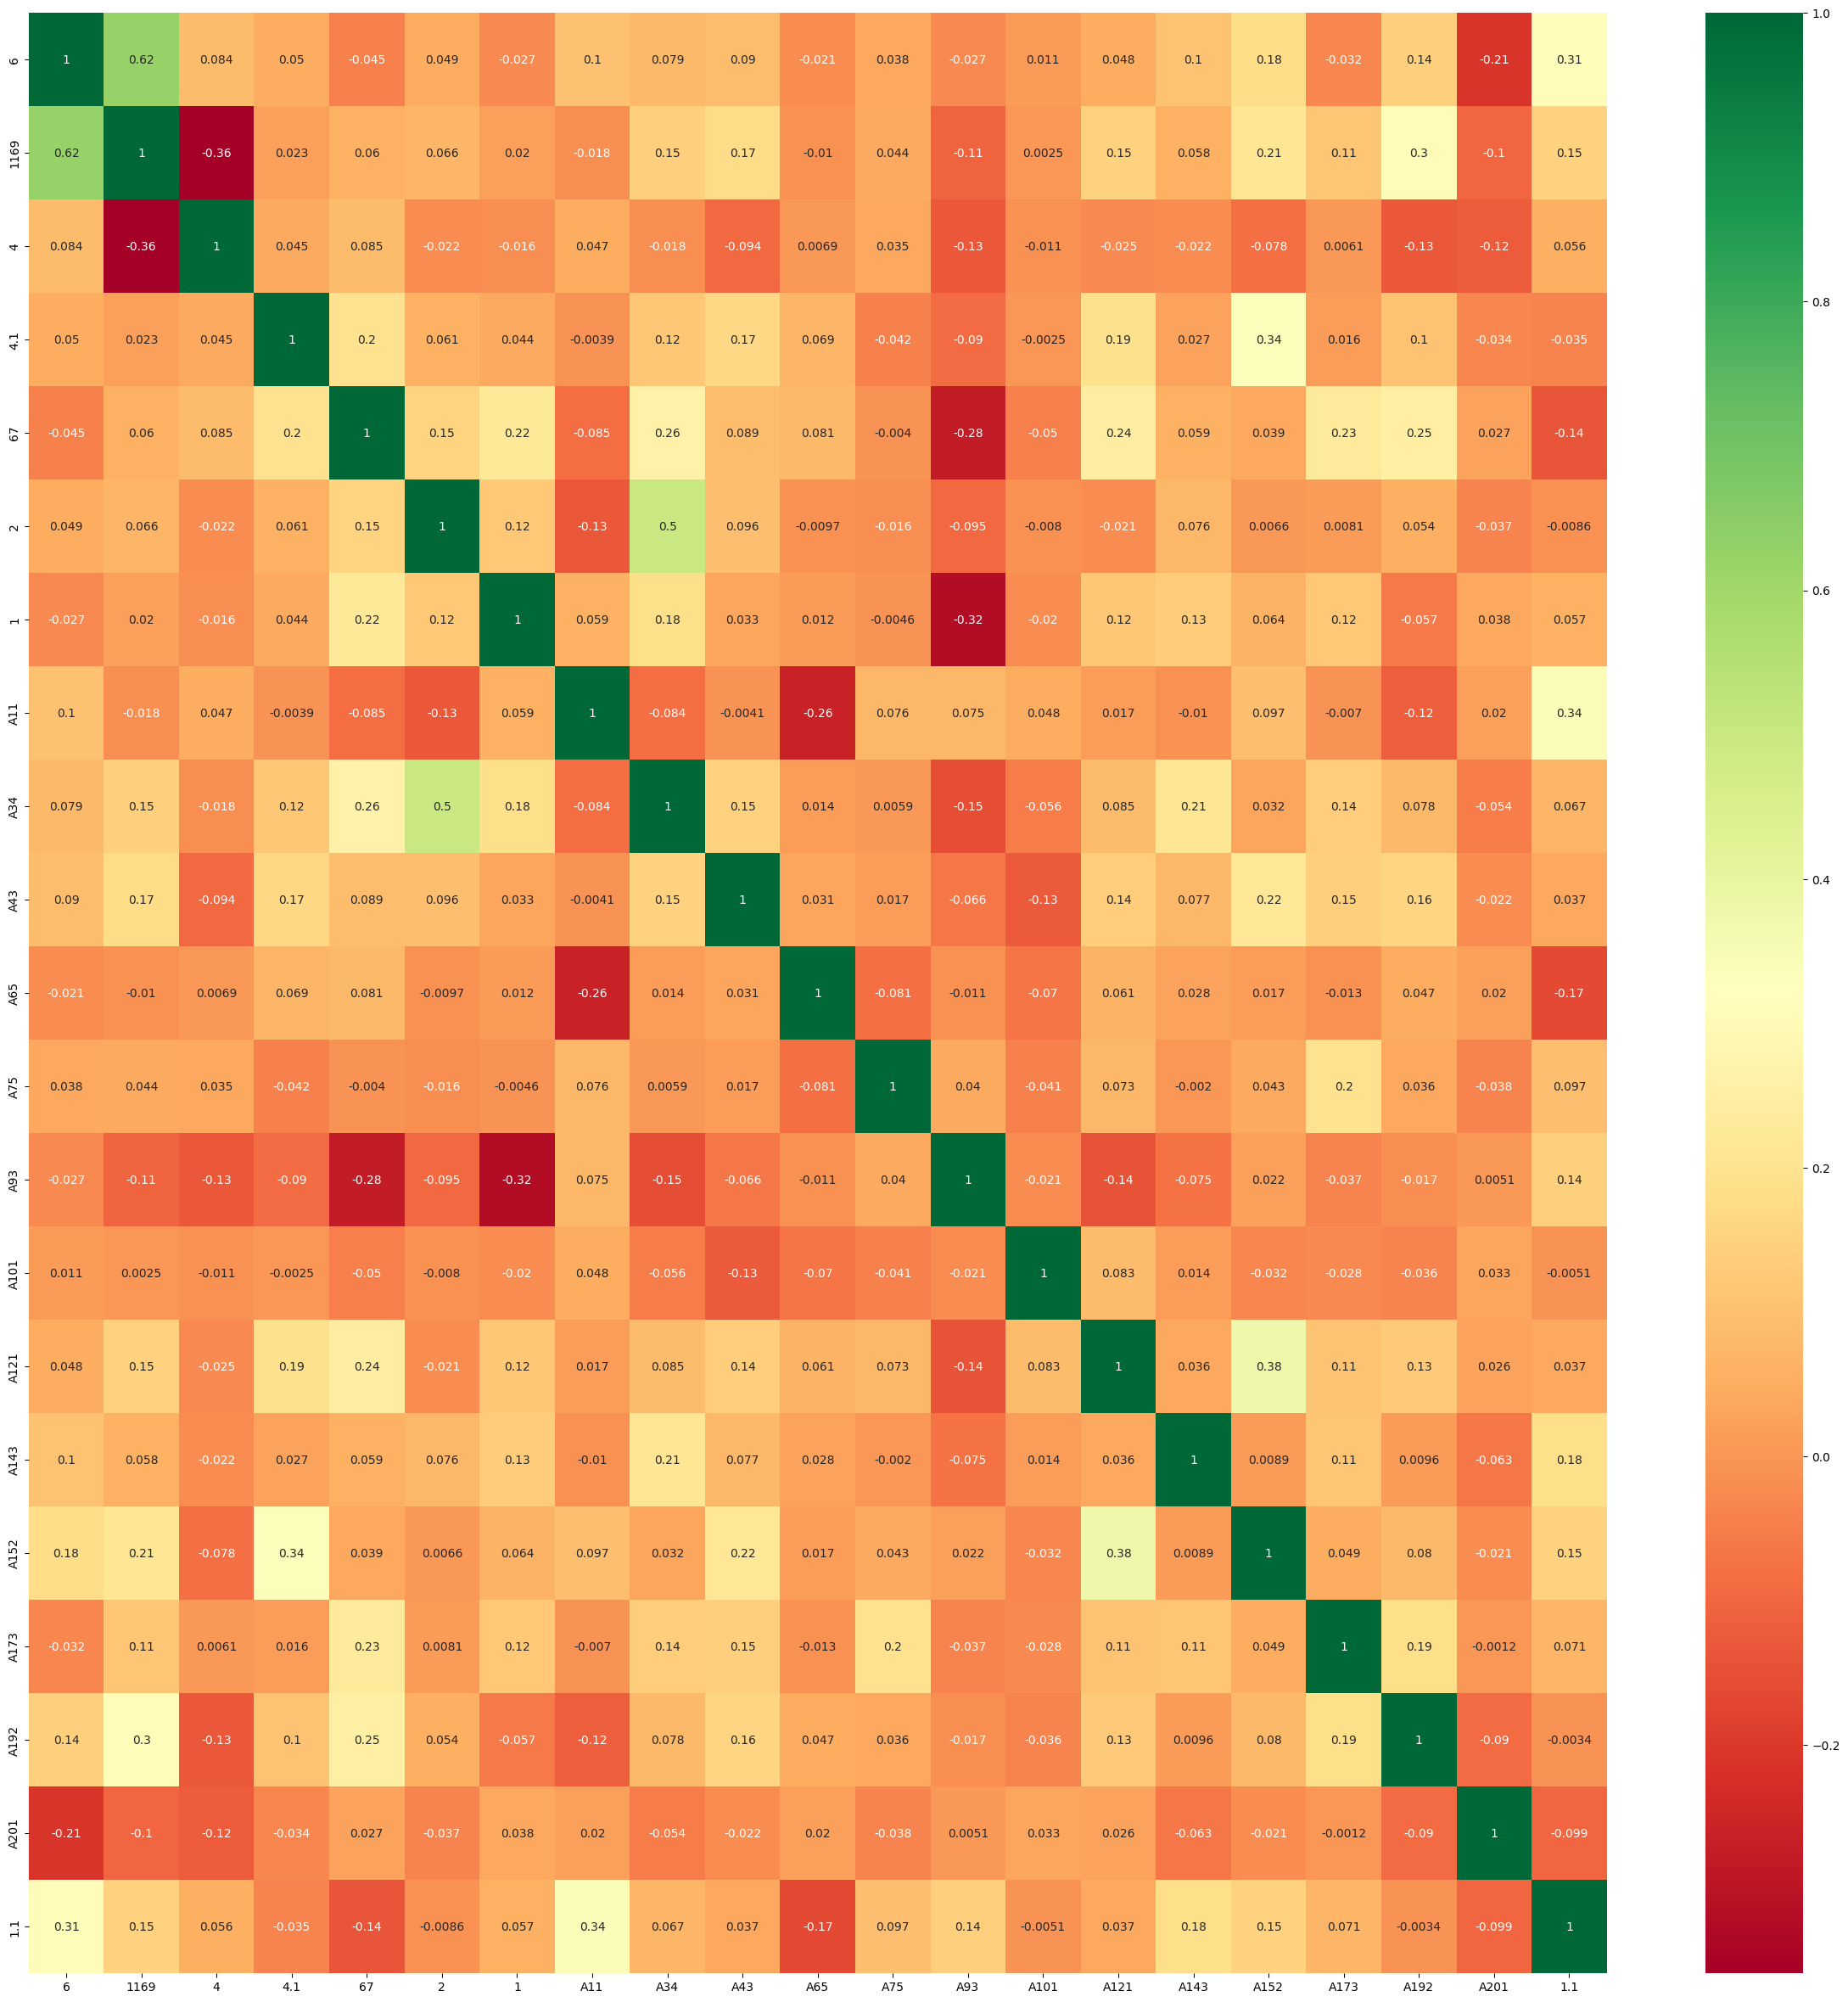

In [219]:
plt.figure(figsize=(30,30))
sns.heatmap(pd.concat([X_train_sm,Y_train_sm],axis=1).corr(method='spearman'),annot=True,cmap="RdYlGn")
plt.show()

In [220]:
X_train_sm_new=X_train_sm.drop(columns=["A192" ,"A101"],axis=1)

In [221]:
X_train_sm_new

,6,1169,4,4.1,67,2,1,A11,A34,A43,A65,A75,A93,A121,A143,A152,A173,A201
0,0.785714,0.362180,0.333333,0.333333,0.053571,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0
1,0.142857,0.116153,0.333333,0.666667,0.535714,0.000000,1.0,0.000000,1.000000,5.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0
2,0.678571,0.485417,0.333333,1.000000,0.464286,0.000000,1.0,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.0
3,0.357143,0.293190,0.666667,1.000000,0.607143,0.333333,1.0,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,0.000000,0.0
4,0.571429,0.560278,0.333333,1.000000,0.285714,0.000000,1.0,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,0.124438,0.082159,0.604823,1.000000,0.076033,0.000000,0.0,1.185532,0.000000,2.000000,0.185532,0.000000,1.185532,0.814468,0.000000,0.000000,0.000000,0.0
840,0.725317,0.296227,0.521237,0.572715,0.176296,0.093952,0.0,0.718145,1.281855,1.436290,0.000000,0.000000,0.718145,0.000000,0.000000,0.000000,2.000000,0.0
841,0.190098,0.058960,1.000000,0.333333,0.101946,0.000000,0.0,1.881835,0.000000,7.763670,0.881835,0.000000,0.881835,0.000000,0.000000,0.881835,0.000000,0.0
842,0.340897,0.197017,0.767754,0.797825,0.163491,0.333333,1.0,2.000000,3.303263,1.696737,0.303263,0.696737,0.000000,2.696737,0.696737,0.696737,0.303263,0.0


In [222]:
model3 = Perceptron(num_features=X_train_sm_new.shape[1],learning_rate=0.01, epochs=10)
model3.train(np.array(X_train_sm_new), np.array(Y_train_sm))

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10


In [223]:
X_test

,6,1169,4,4.1,67,2,1,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
0,9,1549,4,2,35,1,1,2,0,1,1,2,0,0,2,0,0,3,0,0
1,24,1597,4,4,54,2,2,0,1,5,0,1,0,0,3,0,2,0,0,0
2,18,1795,3,4,48,2,1,2,1,0,0,1,1,2,2,1,1,1,1,0
3,20,4272,1,4,24,2,1,1,1,2,0,1,1,0,1,0,0,0,0,0
4,12,976,4,4,35,2,1,0,1,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,12,1736,3,4,31,1,1,0,0,2,0,3,1,0,2,0,0,1,0,0
197,30,3857,4,4,40,1,1,1,0,3,0,0,3,0,1,0,0,2,1,0
198,12,804,4,4,38,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
199,45,1845,4,4,23,1,1,1,0,0,0,0,0,0,3,0,2,0,1,0


In [224]:
X_test_new=X_test.drop(columns=["A192" ,"A101"],axis=1)
pred_test3=model3.predict(X_test_new)
pred_test3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [225]:
print(f1_measuree(y_true=Y_test, y_pred=pred_test3))

{1: 0.8211143695014663, 2: 0}


## R6

In [226]:
Y_train_sm

0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
839    1.0
840    1.0
841    1.0
842    1.0
843    1.0
Name: 1.1, Length: 844, dtype: float64

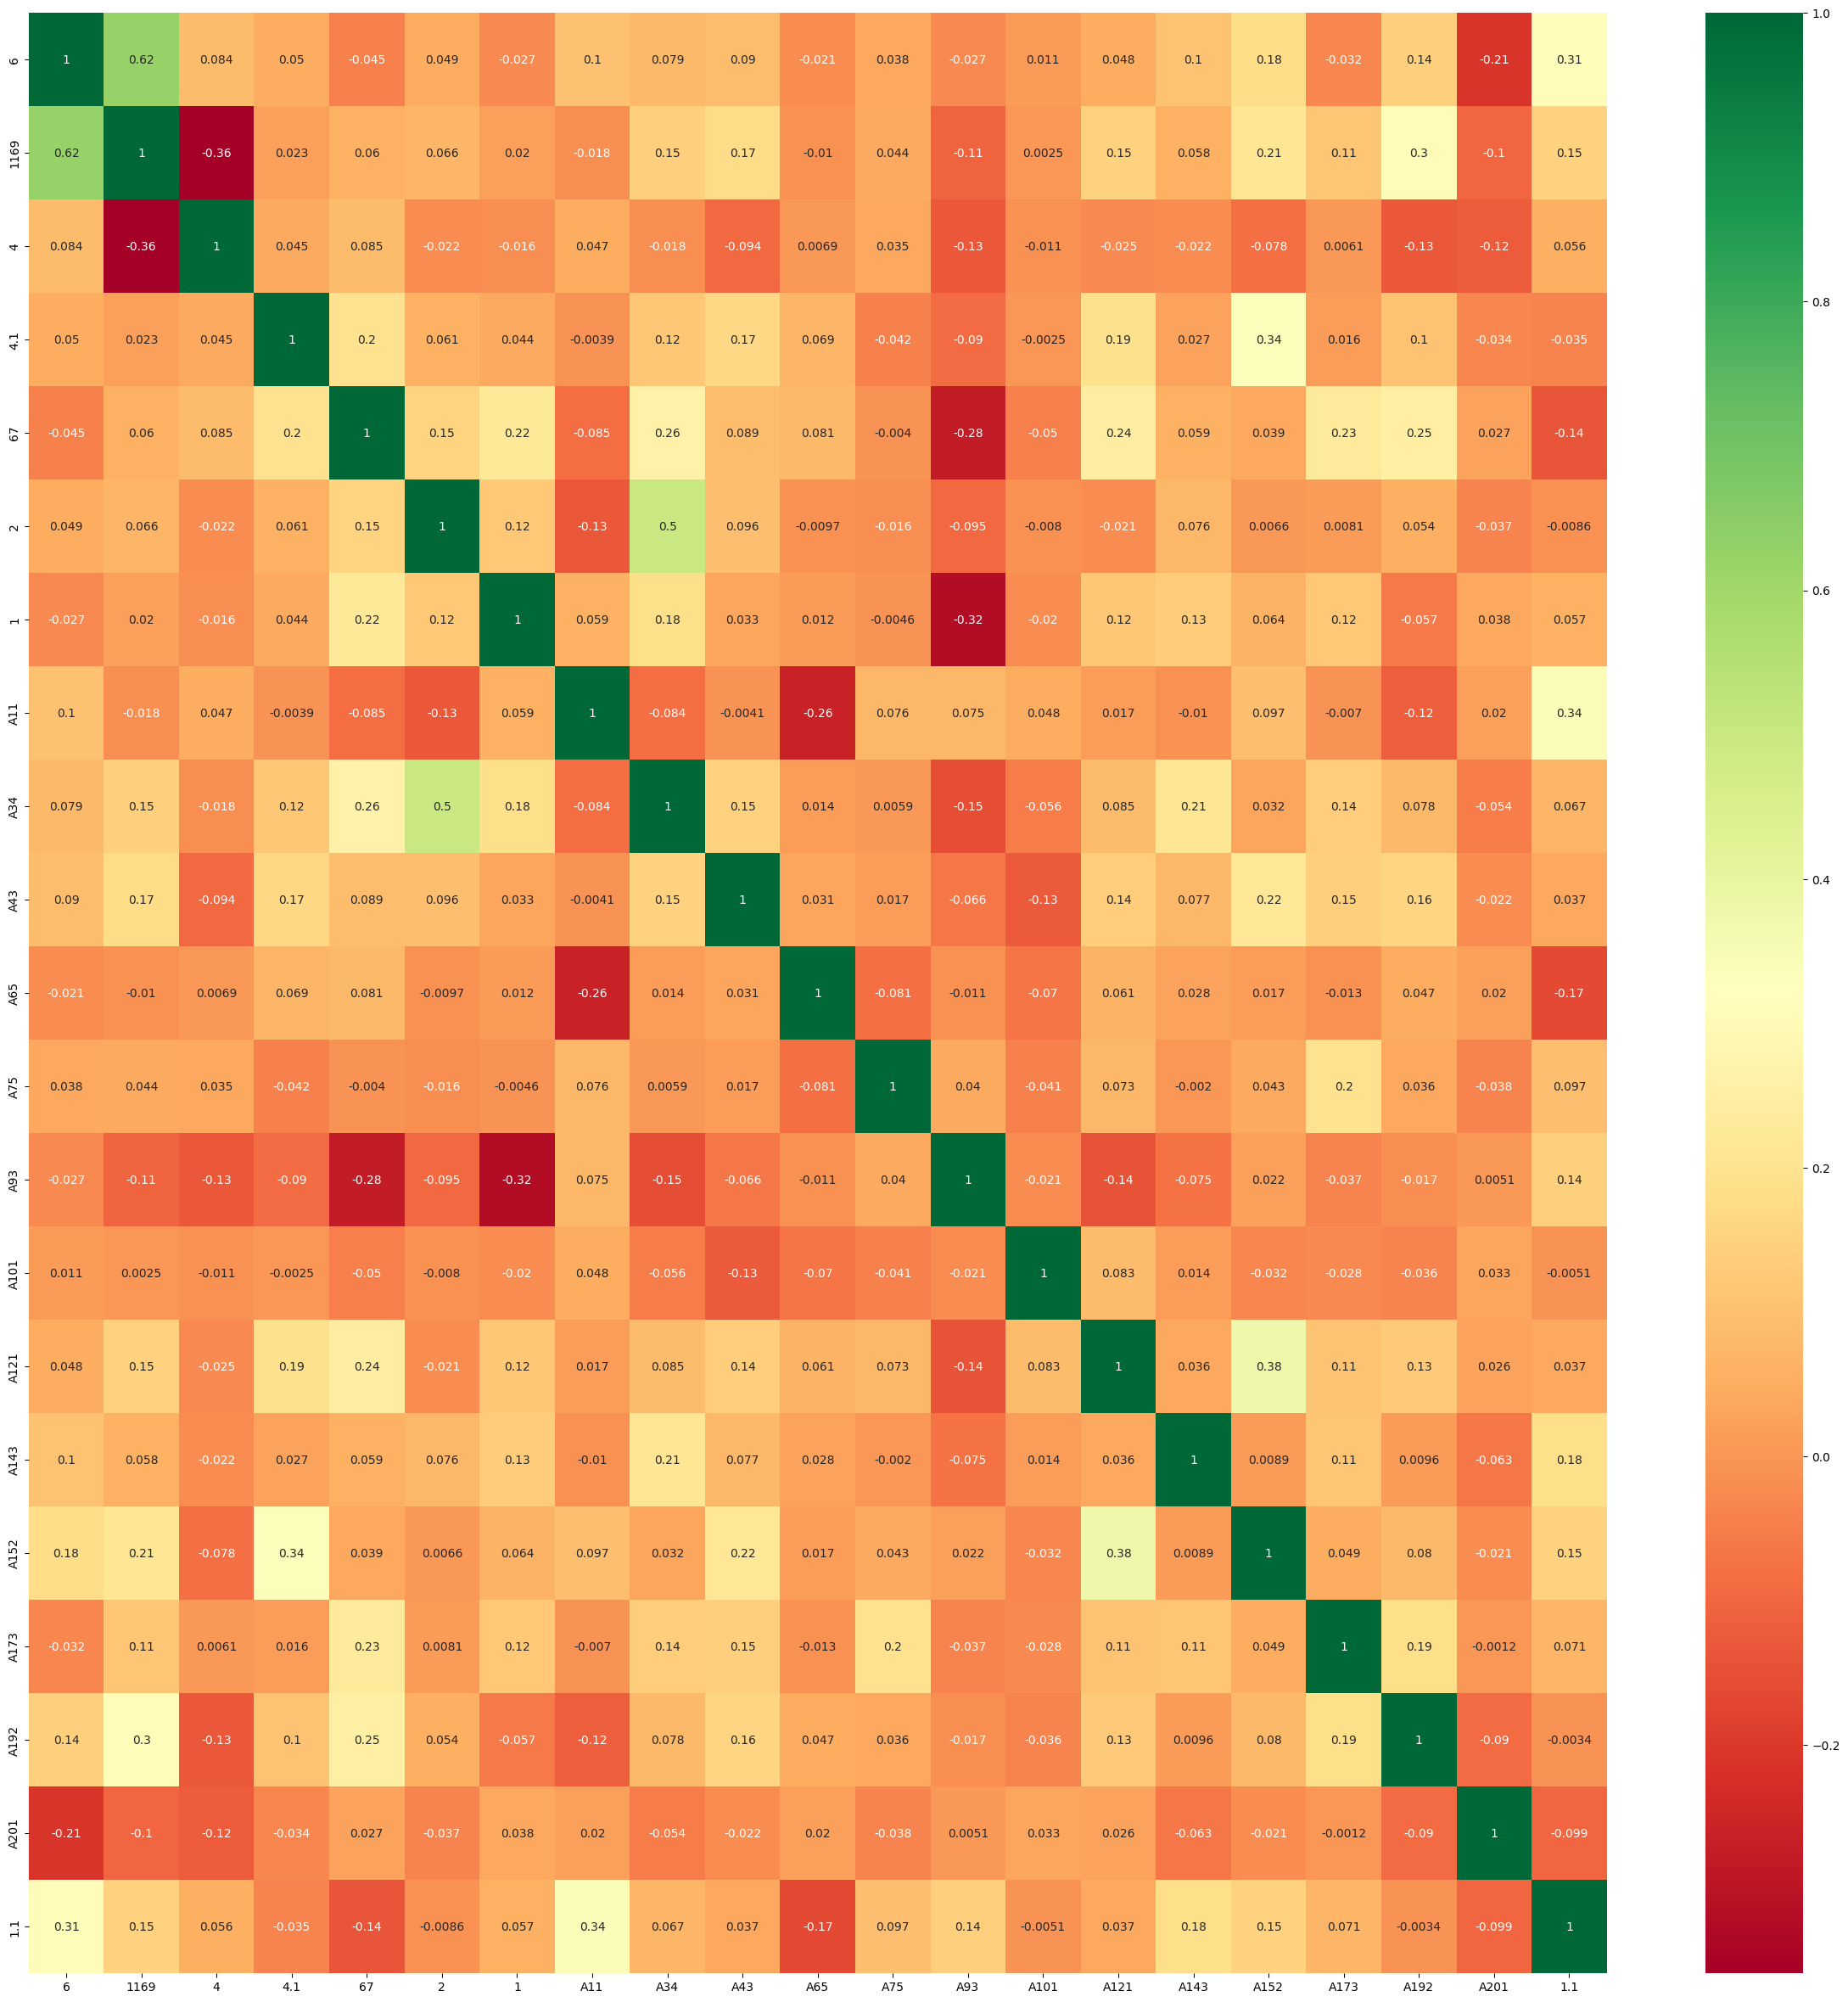

In [227]:
plt.figure(figsize=(30,30))
sns.heatmap(pd.concat([X_train_sm,Y_train_sm],axis=1).corr(method='spearman'),annot=True,cmap="RdYlGn")
plt.show()

## R7

In [228]:
X_val

,6,1169,4,4.1,67,2,1,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
0,7,2329,1,1,45,1,1,1,0,0,0,3,1,1,1,0,0,0,0,0
1,9,918,4,1,30,1,1,1,0,2,0,0,1,0,2,0,0,0,0,0
2,24,1837,4,4,34,1,1,1,3,5,0,2,1,0,3,1,2,1,0,0
3,36,3349,4,2,28,1,1,0,0,2,0,0,1,0,0,0,0,2,1,0
4,10,1275,4,2,23,1,1,3,0,2,0,3,1,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,24,3062,4,3,32,1,1,0,0,2,3,1,0,0,3,0,1,0,1,0
195,9,2301,2,4,22,1,1,0,0,2,2,3,1,0,2,0,1,0,0,0
196,18,7511,1,4,51,1,2,2,0,4,1,1,0,0,2,0,2,0,1,0
197,12,1258,2,4,22,2,1,0,1,2,0,3,1,0,2,0,1,1,0,0


In [229]:
X_val.drop(columns=["A192" ,"A101"],axis=1,inplace=True)

In [230]:
X_val

,6,1169,4,4.1,67,2,1,A11,A34,A43,A65,A75,A93,A121,A143,A152,A173,A201
0,7,2329,1,1,45,1,1,1,0,0,0,3,1,1,0,0,0,0
1,9,918,4,1,30,1,1,1,0,2,0,0,1,2,0,0,0,0
2,24,1837,4,4,34,1,1,1,3,5,0,2,1,3,1,2,1,0
3,36,3349,4,2,28,1,1,0,0,2,0,0,1,0,0,0,2,0
4,10,1275,4,2,23,1,1,3,0,2,0,3,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,24,3062,4,3,32,1,1,0,0,2,3,1,0,3,0,1,0,0
195,9,2301,2,4,22,1,1,0,0,2,2,3,1,2,0,1,0,0
196,18,7511,1,4,51,1,2,2,0,4,1,1,0,2,0,2,0,0
197,12,1258,2,4,22,2,1,0,1,2,0,3,1,2,0,1,1,0


In [231]:
X_val

,6,1169,4,4.1,67,2,1,A11,A34,A43,A65,A75,A93,A121,A143,A152,A173,A201
0,7,2329,1,1,45,1,1,1,0,0,0,3,1,1,0,0,0,0
1,9,918,4,1,30,1,1,1,0,2,0,0,1,2,0,0,0,0
2,24,1837,4,4,34,1,1,1,3,5,0,2,1,3,1,2,1,0
3,36,3349,4,2,28,1,1,0,0,2,0,0,1,0,0,0,2,0
4,10,1275,4,2,23,1,1,3,0,2,0,3,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,24,3062,4,3,32,1,1,0,0,2,3,1,0,3,0,1,0,0
195,9,2301,2,4,22,1,1,0,0,2,2,3,1,2,0,1,0,0
196,18,7511,1,4,51,1,2,2,0,4,1,1,0,2,0,2,0,0
197,12,1258,2,4,22,2,1,0,1,2,0,3,1,2,0,1,1,0


In [232]:
class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.01, epochs=100, fit_intercept=True):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.fit_intercept = fit_intercept

    def predict_class(self, X):
        summation = np.dot(X, self.weights[1:]) + self.weights[0] if self.fit_intercept else np.dot(X, self.weights)
        activation = np.where(summation >= 0, 1, 0)  # Step function
        return activation

    def fit(self, X_train, y_train):
        num_features = X_train.shape[1]
        self.weights = np.zeros(num_features + 1) if self.fit_intercept else np.zeros(num_features)

        # Determine unique classes
        self.classes_ = np.unique(y_train)

        for _ in range(self.epochs):
            print(f'Epoch {_+1}')
            for X, y in zip(X_train, y_train):
                prediction = self.predict_class(X)
                update = self.learning_rate * (y - prediction)
                self.weights[1:] += update * X
                if self.fit_intercept:
                    self.weights[0] += update
        return self

    def predict(self, X):
        return self.predict_class(X)

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

    def get_params(self, deep=True):
        return {'learning_rate': self.learning_rate, 'epochs': self.epochs, 'fit_intercept': self.fit_intercept}
# Define the modified Perceptron class here...

# Assuming X_val is your feature set and Y_val is the corresponding target variable
num_features = X_val.shape[1]

pipeline = Pipeline([
    ('sampling', SMOTE()),
    ('classifier', Perceptron())
])

# Define parameter grid
param_grid = {
    'sampling__sampling_strategy': [0.5, 0.75, 1.0],  # Adjust sampling_strategy
    'sampling__k_neighbors': [5, 6],
    'classifier__learning_rate': [0.001],  # Example parameters for Perceptron
    'classifier__epochs': [5, 100,50]  # Example parameters for Perceptron
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the data
grid_search.fit(np.array(X_val), np.array(Y_val))

# Print the best parameters
print("Best parameters:", grid_search.best_params_)


Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5


In [233]:
sm_new = SMOTE(sampling_strategy=0.5,random_state=42, k_neighbors=5)
X_train.drop(columns=["A192" ,"A101"],axis=1,inplace=True)
X_train_neww, Y_train_neww= sm.fit_resample(X_train, Y_train)

In [234]:
model4 = Perceptron(learning_rate=0.001, epochs=50)
model4.fit(np.array(X_train_neww), np.array(Y_train_neww))

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50


Perceptron(epochs=50, learning_rate=0.001)

In [235]:
X_test_n=X_test.drop(columns=["A192" ,"A101"],axis=1)


In [236]:
X_test_n

,6,1169,4,4.1,67,2,1,A11,A34,A43,A65,A75,A93,A121,A143,A152,A173,A201
0,9,1549,4,2,35,1,1,2,0,1,1,2,0,2,0,0,3,0
1,24,1597,4,4,54,2,2,0,1,5,0,1,0,3,0,2,0,0
2,18,1795,3,4,48,2,1,2,1,0,0,1,1,2,1,1,1,0
3,20,4272,1,4,24,2,1,1,1,2,0,1,1,1,0,0,0,0
4,12,976,4,4,35,2,1,0,1,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,12,1736,3,4,31,1,1,0,0,2,0,3,1,2,0,0,1,0
197,30,3857,4,4,40,1,1,1,0,3,0,0,3,1,0,0,2,0
198,12,804,4,4,38,1,1,0,0,0,0,1,0,0,0,0,0,0
199,45,1845,4,4,23,1,1,1,0,0,0,0,0,3,0,2,0,0


In [237]:
pred_final=model4.predict(np.array(X_test_n))

In [238]:
pred_final

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [239]:
print(f1_measuree(y_true=Y_test, y_pred=pred_final))

{1: 0.8211143695014663, 2: 0}
